<a href="https://colab.research.google.com/github/WinnieAnyoso/Kopa_Project_LDA/blob/main/Kopa_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Introduction

The aim of this project is to build a regression model to predict **Loan Status**.

The input variables in play are described below:
   * Product : The product type purchased by the customer
   * CustomerGender : Self-explanatory
   * Location : The location where the loan was issued. (Also includes a long-tail of legacy locations)
   * Region : The sales region where the device was purchased. Includes many regions which have since been changed. The current               set of main sales regions are Regions 1-7.
   * TotalPrice : The total amount to-be-paid by the customer over the course of the loan (including deposit and daily payments)
   * StartDate : The day on which the customer's loan became active
   * Deposit : The initial deposit required from the customer prior to loan activation
   * DailyRate : The amount that the customer must pay daily in order to continue to use their device
   * TotalDays : The number of days for which the customer is expected to continue paying the daily rate
   * AmountPaid30 : The amount that the customer had repaid as of the 30th day of their loan
   * AmountPaid60 : The amount that the customer had repaid as of the 60th day of their loan

The outcome variables are as follows:
   * AmountPaid360 : The amount that the customer had repaid as of the 360th day of their loan
   * LoanStatus360 : The status of the loan as of day 360:
   * Active : The customer is still actively repaying their loan.
   * Blocked : The customer has had their account blocked after more than 30 days without a payment.
   * Finished Payment : The customer has successfully repaid their loan.


## Importing the necessary libraries

In [1]:
#Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# magic function to allow matplotlib plots to show
%matplotlib inline

## Data Importation and Exploration

In [2]:
#ensuring all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [3]:
#loading the dataframe as df and setting the variable 'StartDate' as  datetime 

df = pd.read_csv('KOPA.csv', parse_dates = ['StartDate'])

In [4]:
#Look at the first five rows
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,2014-07-04,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,2015-01-02,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,2012-12-08,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2015-02-20,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,2013-10-28,2000,50,365,3470,4820,13720,Active


In [51]:
df["LoanStatus360"].unique()

array([0, 1, 2])

In [5]:
#Summarized information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product         9195 non-null   object        
 1   CustomerGender  9195 non-null   object        
 2   Location        9195 non-null   object        
 3   Region          9195 non-null   object        
 4   TotalPrice      9195 non-null   int64         
 5   StartDate       9195 non-null   datetime64[ns]
 6   Deposit         9195 non-null   int64         
 7   DailyRate       9195 non-null   int64         
 8   TotalDays       9195 non-null   int64         
 9   AmountPaid30    9195 non-null   int64         
 10  AmountPaid60    9195 non-null   int64         
 11  AmountPaid360   9195 non-null   int64         
 12  LoanStatus360   9195 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 934.0+ KB


In [6]:
#checking for null values

df.isnull().sum()

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [7]:
#Summary of the characteristics of the numerical columns
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


In [8]:
#Dropping any duplicates present
df.drop_duplicates()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,2014-07-04,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,2015-01-02,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,2012-12-08,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2015-02-20,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,2013-10-28,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Product A,Female,Location 30,Region 2,20250,2016-06-30,2000,50,365,3601,4301,20250,Finished Payment
9191,Product D,Female,Location 57,Region 6,20250,2013-08-04,2000,50,365,4001,5501,20250,Finished Payment
9192,Product B,Female,Location 8,Region 2,16600,2014-06-14,2000,40,365,3401,4601,16600,Finished Payment
9193,Product B,Male,Location 4,Region 4,16600,2014-12-29,2000,40,365,3400,4600,16600,Finished Payment


In [9]:
#Checking whether the duplicates were deleted 
df.duplicated().sum()

0

## Data Visualisation

Visualize the data to gain insights

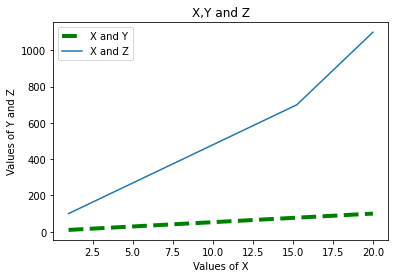

In [10]:
#lineplot. TO DO. Plot line plot and play with markers and line width

X = np.linspace(1, 20, 5)

y = np.linspace(10,100,5)

z = [100, 300,500,700, 1100]

#plt.plot(X,y)
#plt.plot(X,z)

#plt.show()
plt.plot(X, y, color='green', linewidth=4.0, linestyle='--', label='X and Y')

plt.plot(X, z, label='X and Z')

plt.xlabel('Values of X')
plt.ylabel('Values of Y and Z')
plt.title('X,Y and Z')
plt.legend()

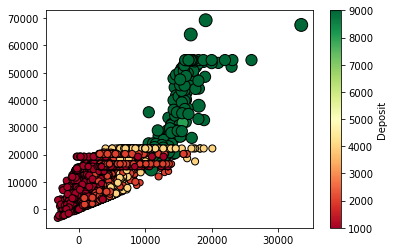

In [11]:
#scatterplot

plt.scatter(df['AmountPaid60'], df['AmountPaid360'], s= df['DailyRate'],
            c=df['Deposit'], cmap='RdYlGn', edgecolors = 'black')
cbar = plt.colorbar()
cbar.set_label('Deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


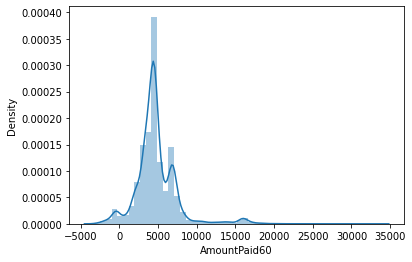

In [12]:
##distribution plot

sns.distplot(df['AmountPaid60'])

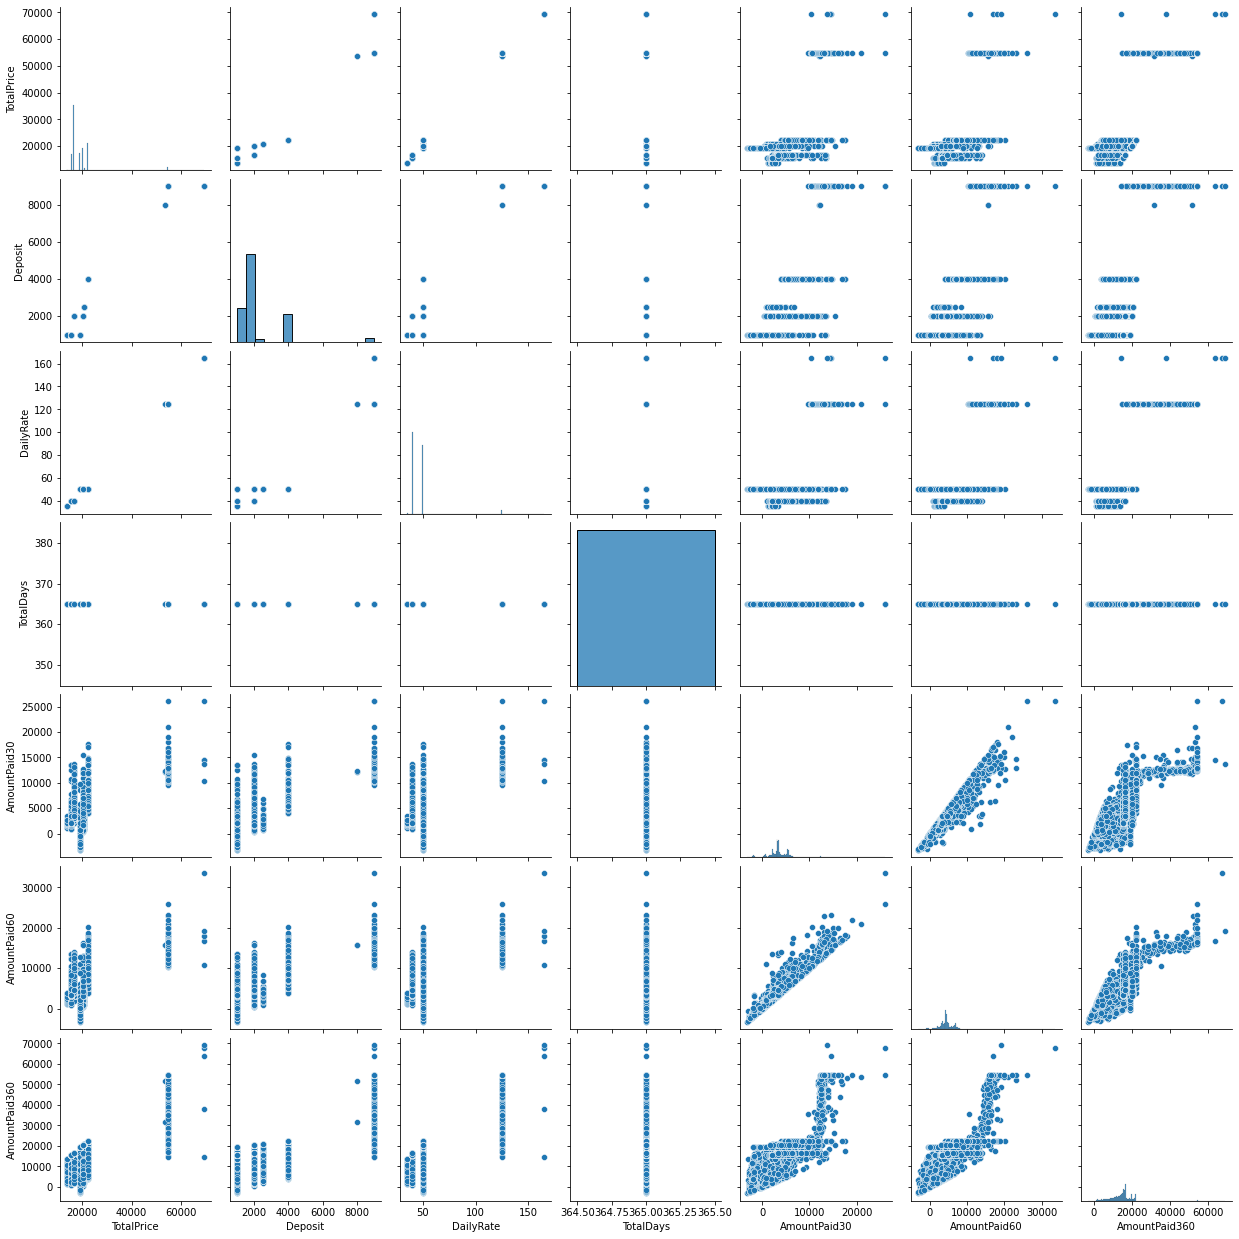

In [13]:
#Pairplot

sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


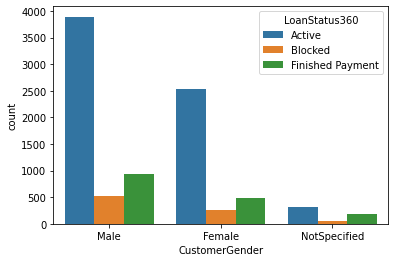

In [14]:
#Countplot
sns.countplot('CustomerGender' , hue = 'LoanStatus360', data = df )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


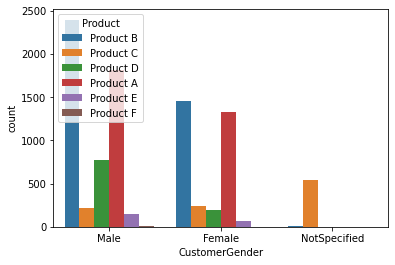

In [15]:
sns.countplot('CustomerGender' , hue = 'Product', data = df)


Product C was most popular amongst those who did not specify their gender


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


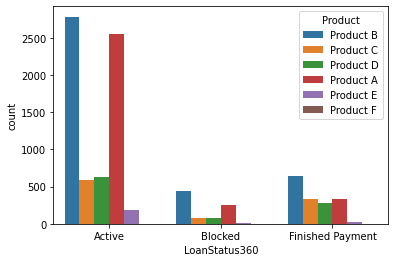

In [16]:
sns.countplot('LoanStatus360', hue ='Product', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Product count'), Text(0.5, 1.0, 'Product and Loan Status')]

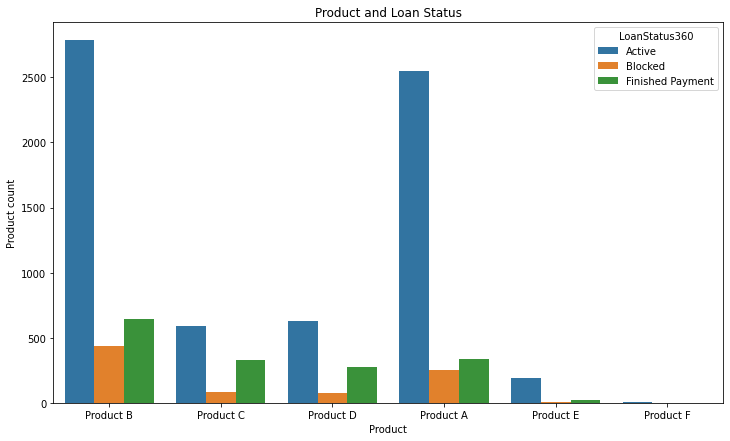

In [17]:
#Adjusting size
plt.figure(figsize=(12,7))

sns.countplot('Product', hue='LoanStatus360', data = df).set(title= 'Product and Loan Status', ylabel = 'Product count')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


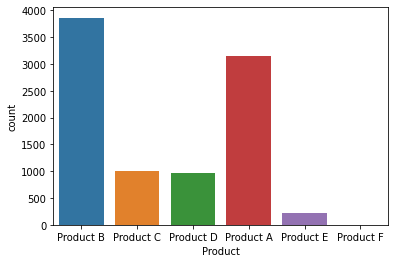

In [18]:
sns.countplot('Product' , data = df)

In [19]:
#Product B is the most popular followed by Product A
#Product F is the least popular followed by Product E

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, ' Product'),
 Text(0.5, 1.0, 'Price vs Product')]

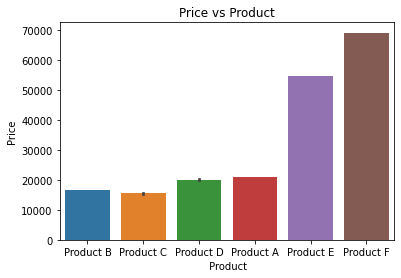

In [20]:
 #Barplot
 sns.barplot(x = 'Product', y = 'TotalPrice', data = df).set(xlabel=' Product',
      ylabel='Price',
      title='Price vs Product')



Product F is the highest priced followed by E which accounts for their low popularity
Product C is the lowest priced 
Product B is the 2nd cheapest which accounts for its popularity
Product A is moderately priced which accounts for its popularity

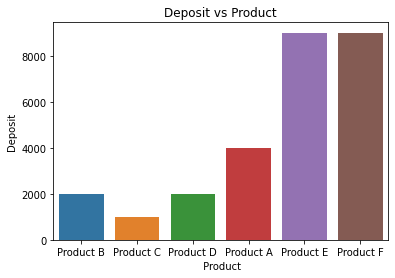

In [21]:
ax = sns.barplot(x = 'Product', y = 'Deposit', data = df, ci = None, estimator = np.median)
ax.set(xlabel=' Product',
       ylabel='Deposit',
       title='Deposit vs Product')
plt.show()

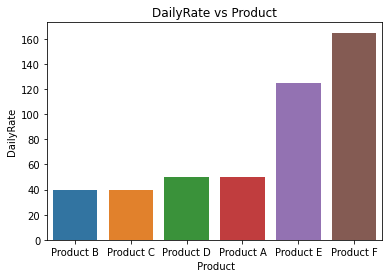

In [22]:
ax = sns.barplot(x = 'Product', y = 'DailyRate', data = df, ci = None, estimator = np.median)
ax.set(xlabel=' Product',
       ylabel='DailyRate',
       title='DailyRate vs Product')
plt.show()

Products B and C have the lowest daily rates
Products E and F have the highest daily rates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


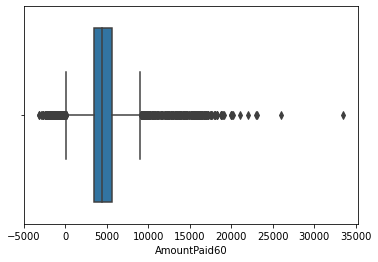

In [23]:
#boxplot

sns.boxplot(df['AmountPaid60'])

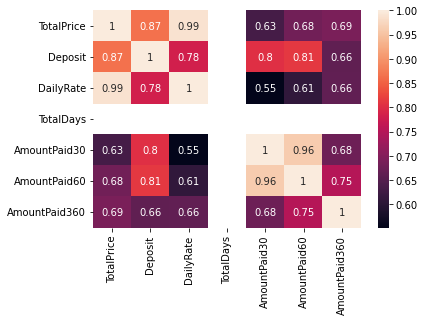

In [24]:
#Heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)


## Feature Engineering

In [25]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,2014-07-04,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,2015-01-02,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,2012-12-08,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2015-02-20,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,2013-10-28,2000,50,365,3470,4820,13720,Active


In [26]:
#Drop columns that we will not use
df.drop(['TotalPrice','TotalDays', 'StartDate','AmountPaid60', 'Location'], axis = 1, inplace = True)

In [27]:
df.head()

,Product,CustomerGender,Region,Deposit,DailyRate,AmountPaid30,AmountPaid360,LoanStatus360
0,Product B,Male,Region 2,2000,40,3121,13621,Active
1,Product B,Male,Region 3,2000,40,3061,15041,Active
2,Product C,Female,Region 5,1000,40,2160,15340,Active
3,Product B,Male,Region 1,2000,40,3041,15321,Active
4,Product D,Female,Region 2,2000,50,3470,13720,Active


In [28]:
#Change our categorical columns into numerical columns
#One hot encode Customer gender
df = pd.get_dummies(df, columns=['CustomerGender'])

In [29]:
df.head()

,Product,Region,Deposit,DailyRate,AmountPaid30,AmountPaid360,LoanStatus360,CustomerGender_Female,CustomerGender_Male,CustomerGender_NotSpecified
0,Product B,Region 2,2000,40,3121,13621,Active,0,1,0
1,Product B,Region 3,2000,40,3061,15041,Active,0,1,0
2,Product C,Region 5,1000,40,2160,15340,Active,1,0,0
3,Product B,Region 1,2000,40,3041,15321,Active,0,1,0
4,Product D,Region 2,2000,50,3470,13720,Active,1,0,0


In [30]:
#Label encode the rest

#Import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder

#Initialise the encoder
le = LabelEncoder()

#Get a list called objects that contains the columns with categorical data
objects= df.select_dtypes(include = 'object').columns


#Label encode these columns using the label encoder
for column in objects:
  df[column]=le.fit_transform(df[column])

In [31]:
#Confirm the changes
df.head()

,Product,Region,Deposit,DailyRate,AmountPaid30,AmountPaid360,LoanStatus360,CustomerGender_Female,CustomerGender_Male,CustomerGender_NotSpecified
0,1,10,2000,40,3121,13621,0,0,1,0
1,1,11,2000,40,3061,15041,0,0,1,0
2,2,13,1000,40,2160,15340,0,1,0,0
3,1,0,2000,40,3041,15321,0,0,1,0
4,3,10,2000,50,3470,13720,0,1,0,0


### Linear discriminant Analysis

In [48]:

# Separate our features(X) and target(y)

X = df.drop('LoanStatus360', axis = 1)

y = df['LoanStatus360']

In [49]:

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

# Display the coeficients of the reducted columns
lda_.coef_


array([[-1.60432007e-02,  2.35790840e-03,  1.45032021e-04,
        -9.33754211e-04, -1.09995997e-04,  1.24432155e-05,
         3.90535111e-02, -8.21852614e-03, -1.25313409e-01],
       [ 3.14645591e-01, -3.53900943e-03,  7.72319198e-04,
         1.06366561e-01,  2.07480216e-04, -6.35787255e-04,
        -1.95903108e-01,  9.35069839e-02,  3.99278393e-01],
       [-9.91090071e-02, -8.03765550e-03, -1.01839457e-03,
        -5.23752118e-02,  3.52520142e-04,  2.84221459e-04,
        -6.04594969e-02, -1.49489564e-02,  3.15383822e-01]])

In [50]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
CustomerGender_Female,0.039054
Region,0.002358
Deposit,0.000145
AmountPaid360,0.000012
AmountPaid30,-0.000110
DailyRate,-0.000934
CustomerGender_Male,-0.008219
Product,-0.016043
CustomerGender_NotSpecified,-0.125313


### Recommendatons 

From our analysis, it is safe to conclude that we can use  a linear combination of the following features to comfortably predict if an individual has an active loan status or not.


* CustomerGender_Female
*  Region
* Deposit
* Amountpaid360

---

